In [3]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import csv
import pickle
from IPython.display import Image

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Data Reading 

In [22]:
RUL_data_1=pd.read_csv("../archive/CMaps/RUL_FD001.txt",sep=" ",header=None)
RUL_data_2=pd.read_csv("../archive/CMaps/RUL_FD002.txt",sep=" ",header=None)
RUL_data_3=pd.read_csv("../archive/CMaps/RUL_FD003.txt",sep=" ",header=None)
RUL_data_4=pd.read_csv("../archive/CMaps/RUL_FD004.txt",sep=" ",header=None)

In [23]:
train_data_1=pd.read_csv("../archive/CMaps/train_FD001.txt",sep=" ",header=None)
train_data_2=pd.read_csv("../archive/CMaps/train_FD002.txt",sep=" ",header=None)
train_data_3=pd.read_csv("../archive/CMaps/train_FD003.txt",sep=" ",header=None)
train_data_4=pd.read_csv("../archive/CMaps/train_FD004.txt",sep=" ",header=None)

In [24]:
test_data_1=pd.read_csv("../archive/CMaps/test_FD001.txt",sep=" ",header=None)
test_data_2=pd.read_csv("../archive/CMaps/test_FD002.txt",sep=" ",header=None)
test_data_3=pd.read_csv("../archive/CMaps/test_FD003.txt",sep=" ",header=None)
test_data_4=pd.read_csv("../archive/CMaps/test_FD004.txt",sep=" ",header=None)

This analysis use data :

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)
Experimental Scenario
Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine � i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to: 1) unit number 2) time, in cycles 3) operational setting 1 4) operational setting 2 5) operational setting 3 6) sensor measurement 1 7) sensor measurement 2 ... 26) sensor measurement 26

here provided 3 types of data in the form of text. i.e. train data, test data, RUL data.

train data describes the run to failure / breakdown. if maintenance is done from here it means "breakdown maintenance". The disadvantage of breakdown maintenance is a loss in profit and time. where the engine was supposed to work, it suddenly stopped and had to be repaired

test data describes the engine has stopped before failure / breakdown. if maintenance is carried out from here it means "preventive maintenance". the loss of preventive maintenance is a loss in the cost of spare parts. where engine spare parts that should still be able to work and the remaining lifetime is still long must be replaced immediately

RUL data describes the rest of the engine can still operate after the engine stops during test data

of the three data above will be analyzed when is the right time to do predictive maintenance. so that the maintenance process can be more measurable in terms of cost of funds without losing time

Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, �Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation�, in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

In [25]:
data_RUL=RUL_data_1
data_RUL

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


In [26]:
data_train=train_data_1
data_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [27]:
data_test=test_data_1
data_test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [28]:
data_train.drop(columns=[26,27],inplace=True)
data_test.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [29]:
columns_train = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
data_train.columns = columns_train
data_train.describe()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [30]:
#sort data about unit_ID and cycles

data_train_cycles = data_train.loc[:, 'unit_ID':'cycles']
data_train_cycles

,unit_ID,cycles
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
20626,100,196
20627,100,197
20628,100,198
20629,100,199


In [31]:
print('unit_ID : ',data_train.unit_ID.unique())

unit_ID :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [32]:
#sort data unit_ID get maximum cycles or how to know when machine failure

data_train_cycles_failure = pd.DataFrame(data_train.groupby('unit_ID')['cycles'].max()).reset_index()
data_train_cycles_failure.columns = ['unit_ID', 'failure']
data_train_cycles_failure

,unit_ID,failure
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [33]:
#merge failure data and RUL data to dataset

data_train=data_train.merge(data_train_cycles_failure,on=['unit_ID'],how='left')
data_train['RUL']=data_train['failure']-data_train["cycles"]
data_train

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,failure,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


In [34]:
#data test column labelling

columns_test = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
data_test.columns = columns_test
data_test.describe()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,...,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


In [35]:
#data RUL column labelling

columns_RUL = ['RUL']
data_RUL.columns = columns_RUL
data_RUL.insert(0, 'unit_ID', range(1, 1 + len(data_RUL)))
data_RUL

,unit_ID,RUL
0,1,112
1,2,98
2,3,69
3,4,82
4,5,91
...,...,...
95,96,137
96,97,82
97,98,59
98,99,117


In [36]:
#sort data unit_ID get maximum cycles

data_test_cycles_MAX = pd.DataFrame(data_test.groupby('unit_ID')['cycles'].max()).reset_index()
data_test_cycles_MAX.columns = ['unit_ID', 'cycles MAX']
data_test_cycles_MAX

,unit_ID,cycles MAX
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
...,...,...
95,96,97
96,97,134
97,98,121
98,99,97


In [37]:
data_test=data_test.merge(data_RUL,on=['unit_ID'],how='left')
data_test=data_test.merge(data_test_cycles_MAX,on=['unit_ID'],how='left')
data_test['failure']=data_test['cycles MAX']+data_test['RUL']
data_test

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL,cycles MAX,failure
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,112,31,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,112,31,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,112,31,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,112,31,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,112,31,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,20,198,218
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,20,198,218
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,20,198,218
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,20,198,218


In [38]:
#sort data unit_ID get best performance or most long time failure from data train

data_train_cycles.loc[data_train_cycles['cycles'].idxmax()]

unit_ID     69
cycles     362
Name: 13992, dtype: int64

In [39]:
#sort data unit_ID 69 from start until failure

unit_ID_69 = data_train.loc[13631:13992, ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32', 'failure','RUL']]
unit_ID_69

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,failure,RUL
13631,69,1,-0.0014,-0.0001,100.0,518.67,641.96,1587.10,1400.65,14.62,...,8136.88,8.4094,0.03,392,2388,100.0,38.87,23.4081,362,361
13632,69,2,-0.0003,-0.0004,100.0,518.67,641.50,1594.24,1401.54,14.62,...,8139.88,8.4172,0.03,392,2388,100.0,39.02,23.4189,362,360
13633,69,3,0.0006,-0.0003,100.0,518.67,642.73,1585.41,1405.22,14.62,...,8136.42,8.3869,0.03,392,2388,100.0,38.82,23.3756,362,359
13634,69,4,-0.0001,-0.0003,100.0,518.67,642.00,1586.57,1408.44,14.62,...,8142.92,8.3890,0.03,391,2388,100.0,38.99,23.2744,362,358
13635,69,5,0.0026,0.0002,100.0,518.67,642.37,1582.60,1403.07,14.62,...,8138.93,8.4042,0.03,392,2388,100.0,38.87,23.3195,362,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,69,358,0.0040,-0.0002,100.0,518.67,643.74,1609.53,1428.26,14.62,...,8129.59,8.5460,0.03,397,2388,100.0,38.53,23.0549,362,4
13989,69,359,0.0013,0.0003,100.0,518.67,643.46,1603.83,1429.82,14.62,...,8131.20,8.5116,0.03,396,2388,100.0,38.28,23.0610,362,3
13990,69,360,0.0004,-0.0001,100.0,518.67,643.97,1597.75,1428.85,14.62,...,8126.63,8.5059,0.03,396,2388,100.0,38.47,23.0422,362,2
13991,69,361,0.0016,-0.0002,100.0,518.67,643.65,1603.50,1433.95,14.62,...,8132.97,8.5270,0.03,396,2388,100.0,38.52,23.1208,362,1


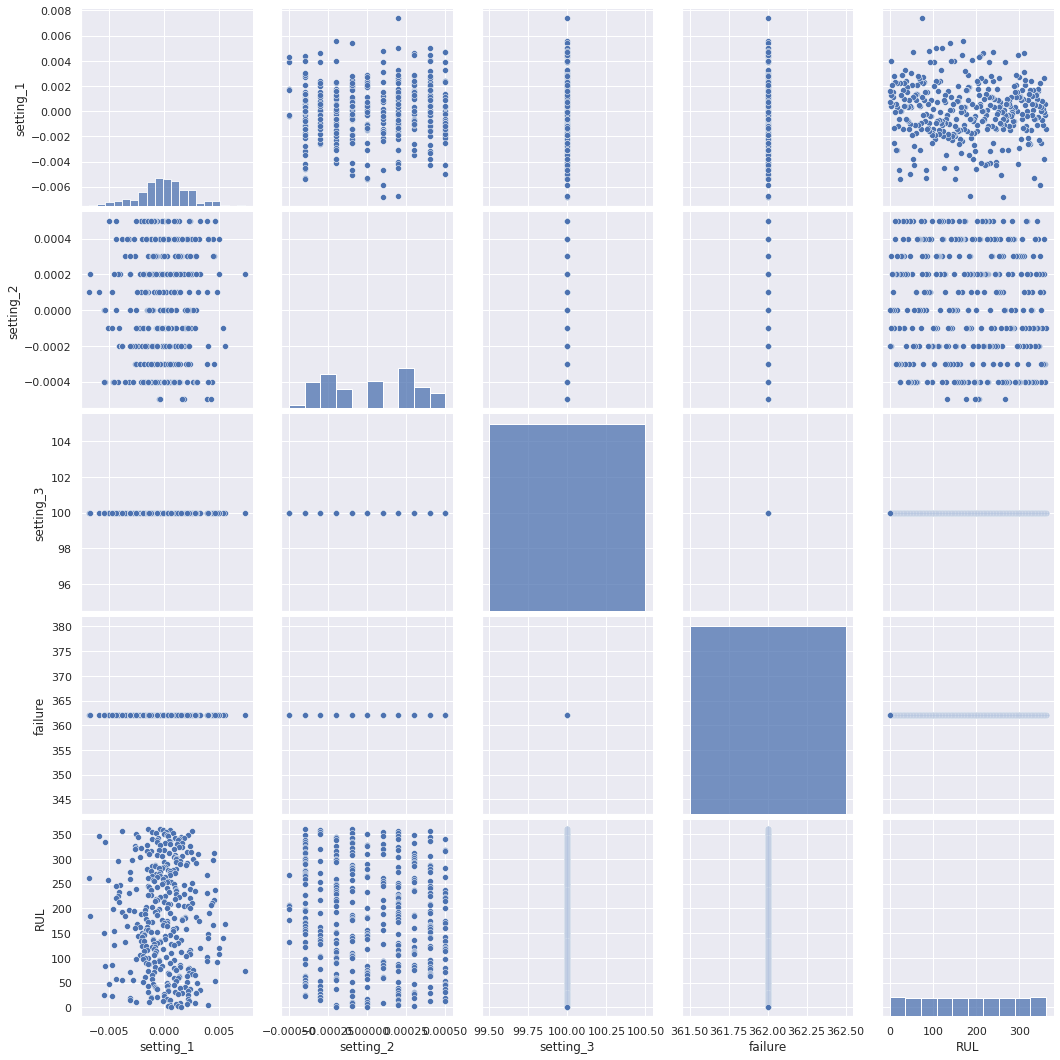

In [40]:
#check distribution plot setting_1, setting_2, setting_2 with cycles

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

sns.set()
cols = ['setting_1','setting_2','setting_3','failure', 'RUL']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

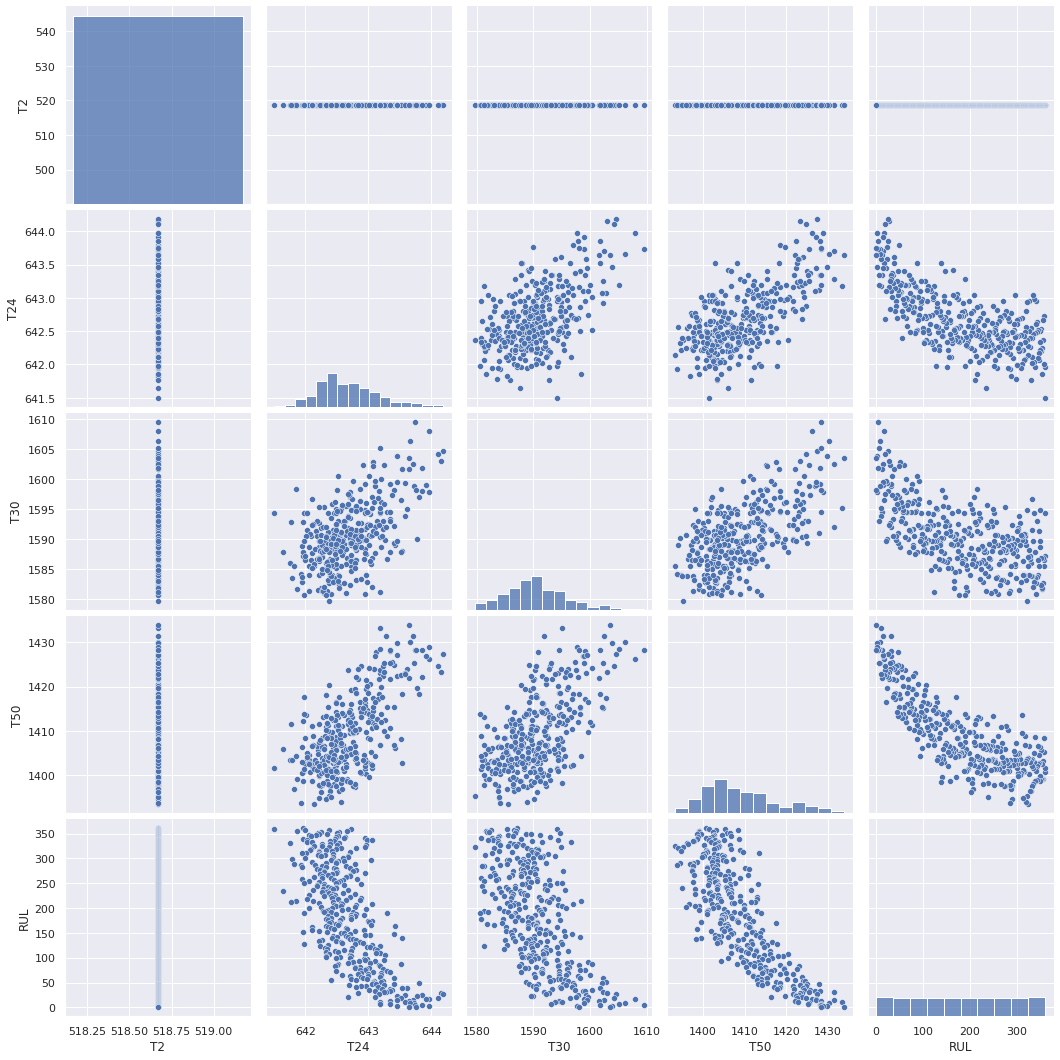

In [41]:
# check temperature correlation

sns.set()
cols = ['T2','T24','T30','T50', 'RUL']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

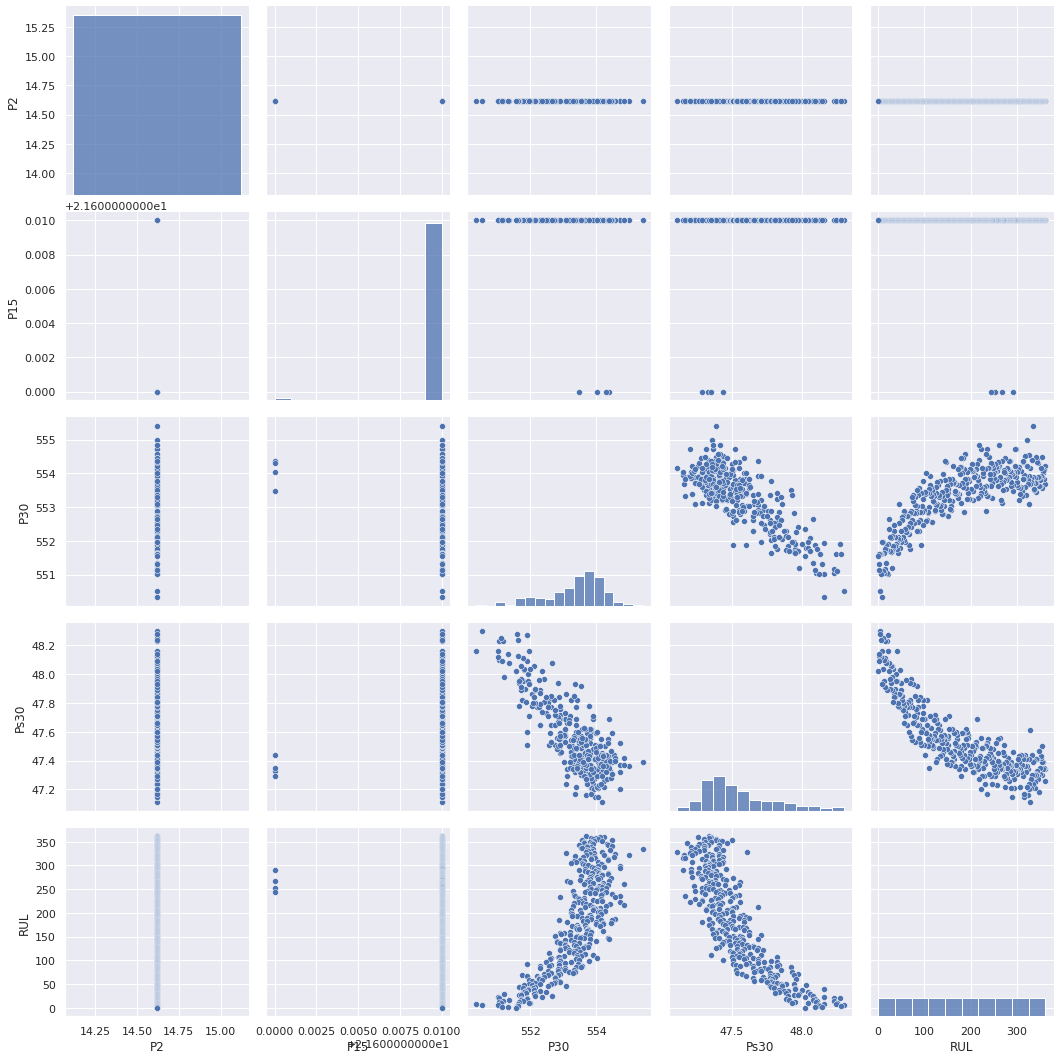

In [42]:
# check pressure correlation

sns.set()
cols = ['P2','P15','P30','Ps30', 'RUL']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

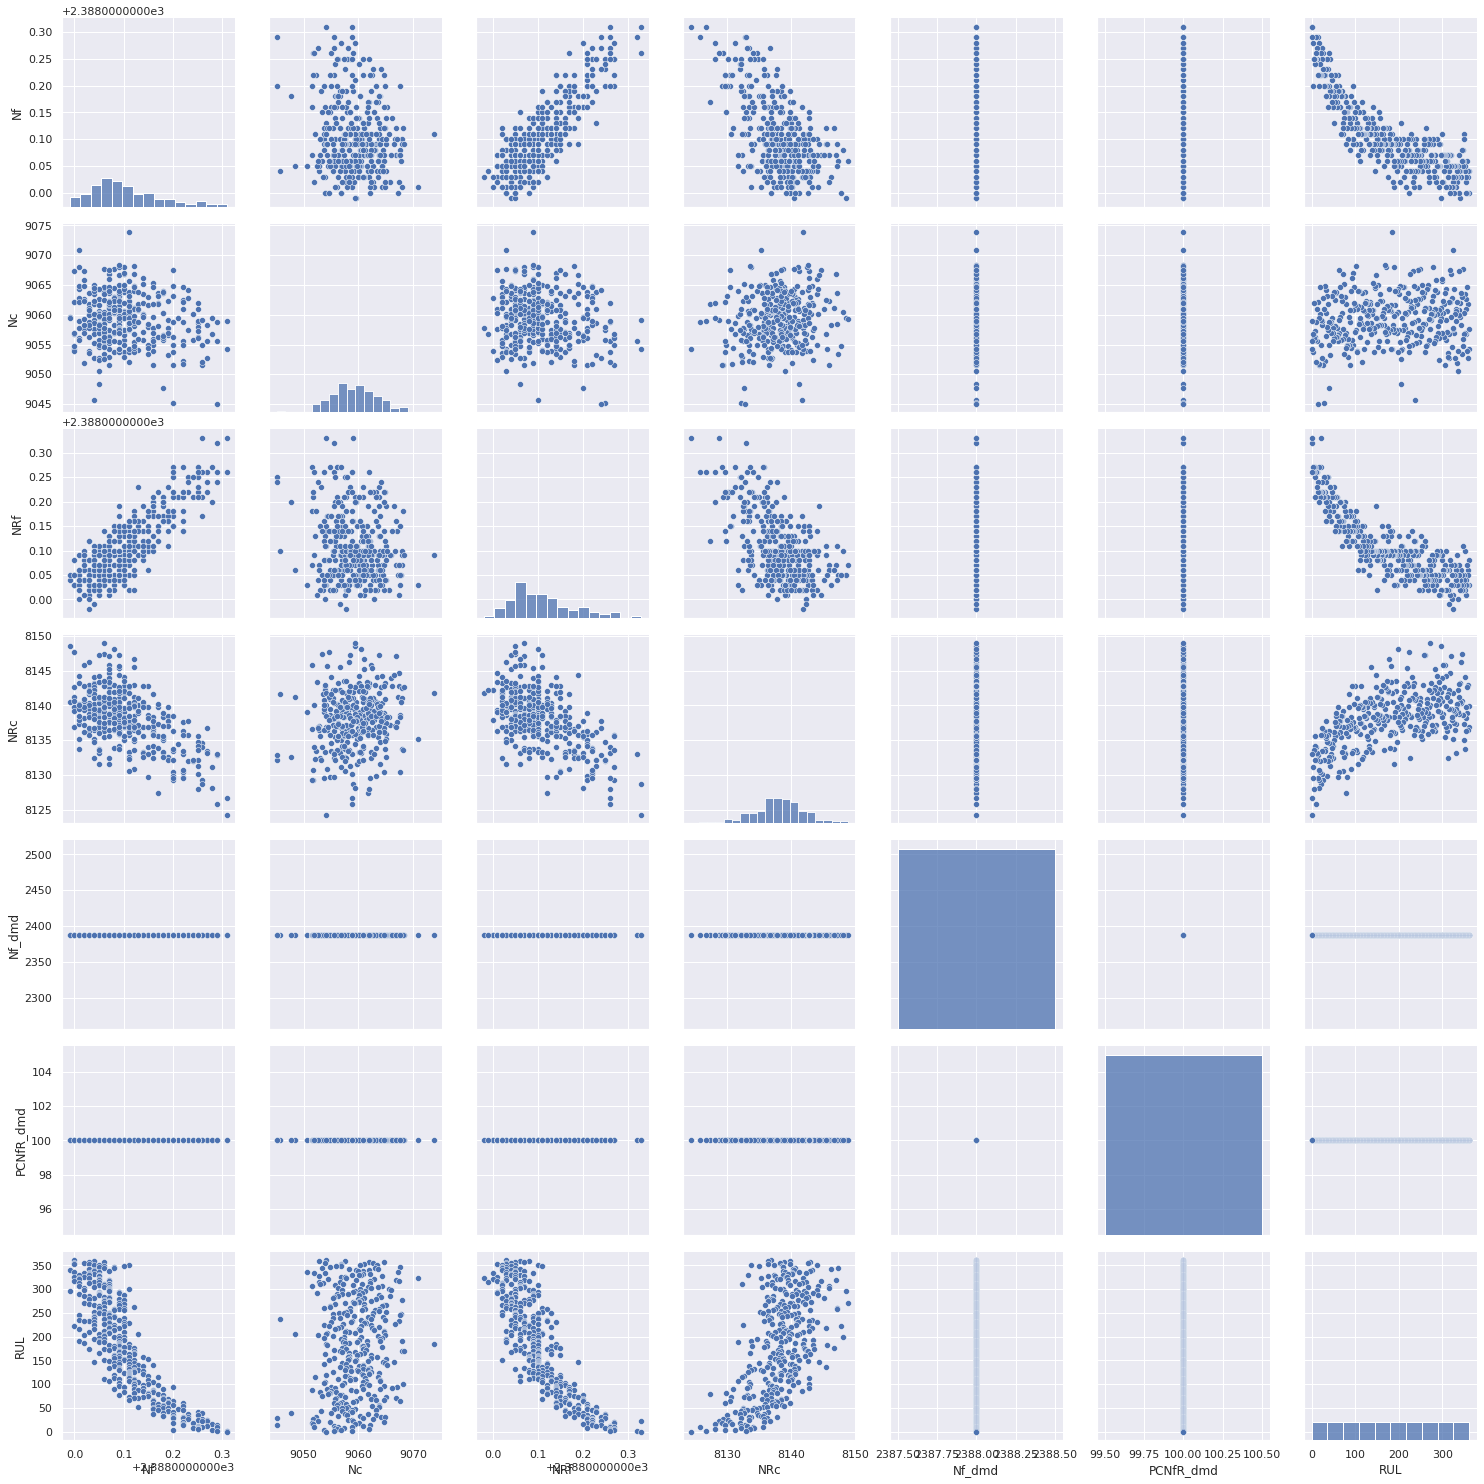

In [43]:
# check rotation correlation

sns.set()
cols = ['Nf','Nc','NRf','NRc','Nf_dmd','PCNfR_dmd', 'RUL']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

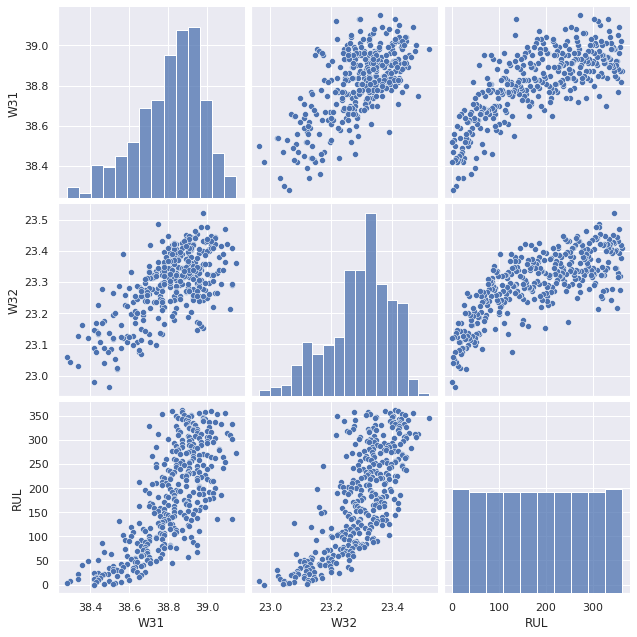

In [44]:
# check coolant flow correlation

sns.set()
cols = ['W31','W32', 'RUL']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

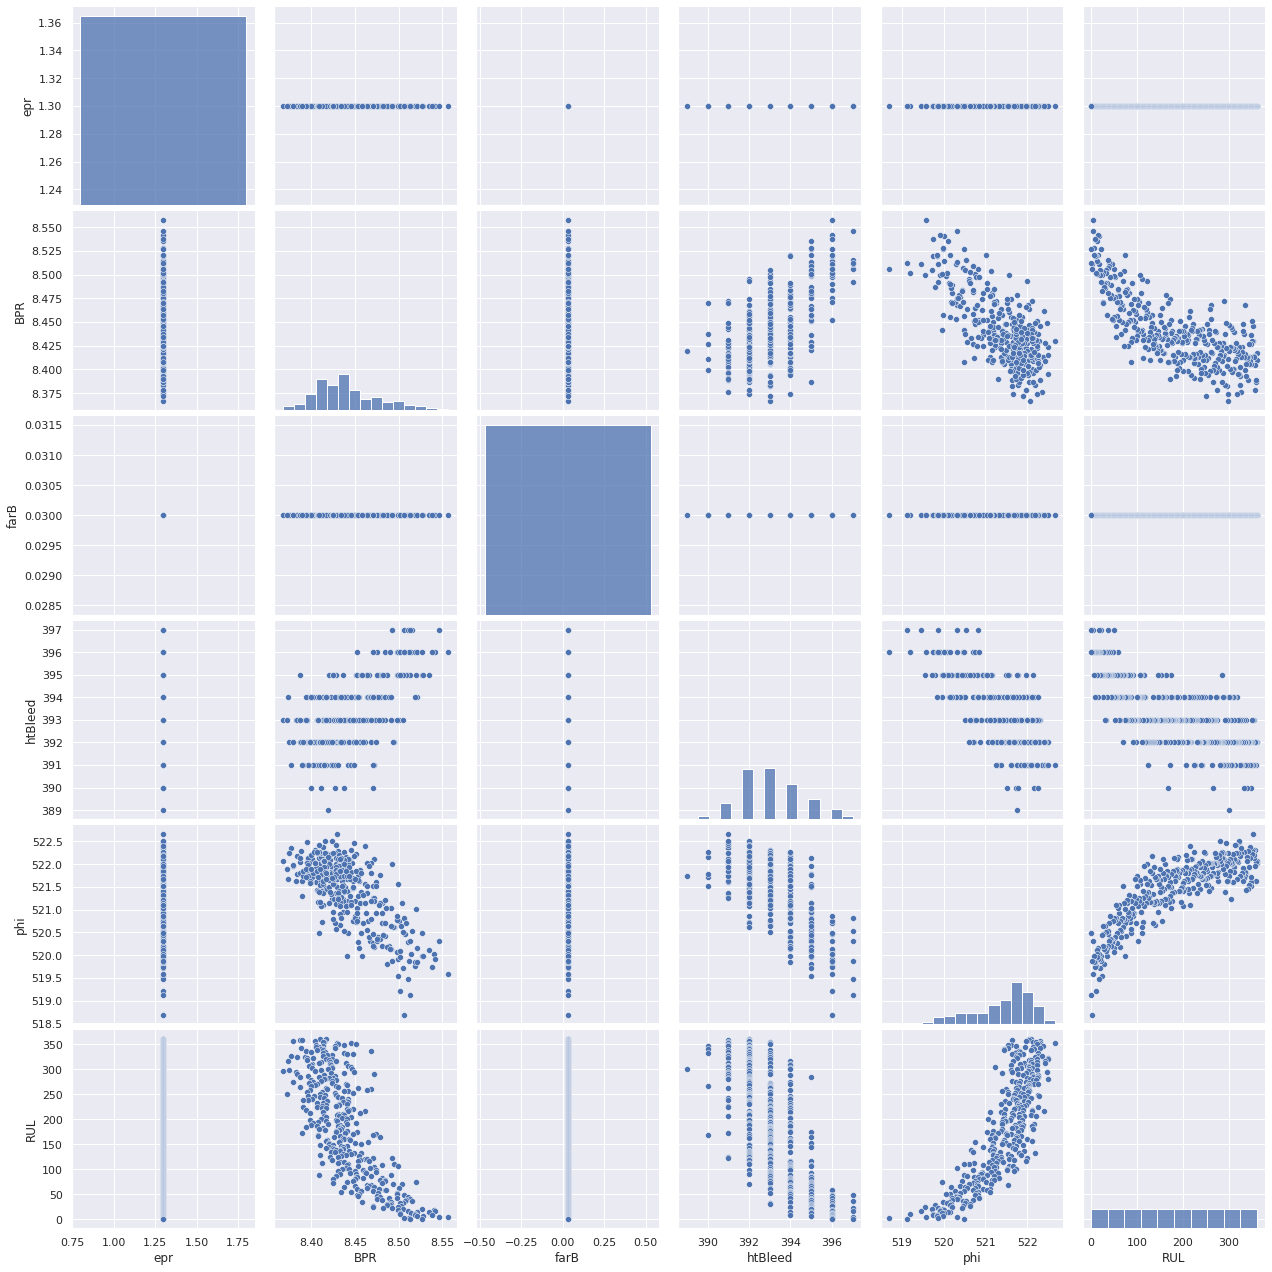

In [45]:
# check correlation of variable independent without unit 

sns.set()
cols = ['epr','BPR', 'farB', 'htBleed','phi', 'RUL']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

In [46]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
unit_ID,0,0.0
cycles,0,0.0
failure,0,0.0
W32,0,0.0
W31,0,0.0
PCNfR_dmd,0,0.0
Nf_dmd,0,0.0
htBleed,0,0.0
farB,0,0.0
BPR,0,0.0


In [47]:
# create X (features) and y (response)
# only choose feature which has a change in value with engine failure
Selected_features = ['cycles', 'T24', 'T30', 'T50','P15', 'P30','Nf', 'Nc','Ps30','NRf', 'NRc', 'BPR']

X = data_train[Selected_features]
y = data_train['RUL']

from sklearn.model_selection import train_test_split


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [51]:
x_train

,cycles,T24,T30,T50,P15,P30,Nf,Nc,Ps30,NRf,NRc,BPR
7084,97,643.21,1591.07,1413.72,21.61,553.22,2388.16,9054.53,47.75,2388.13,8134.51,8.4631
17606,267,643.22,1599.65,1426.99,21.61,552.14,2388.21,9079.52,48.18,2388.18,8145.98,8.4934
9377,113,642.23,1586.49,1395.82,21.61,553.83,2388.08,9074.51,47.21,2388.03,8151.69,8.4191
17563,224,642.43,1591.28,1413.61,21.61,552.57,2388.18,9074.06,47.64,2388.18,8142.50,8.4593
9901,191,643.22,1605.49,1422.66,21.61,551.85,2388.14,9124.24,48.21,2388.22,8193.04,8.5208
...,...,...,...,...,...,...,...,...,...,...,...,...
5829,37,642.22,1583.19,1392.92,21.61,555.34,2387.99,9055.90,47.31,2387.99,8143.49,8.4177
19223,213,643.22,1595.42,1423.57,21.61,552.15,2388.16,9088.72,47.84,2388.14,8165.66,8.4171
6390,170,643.54,1596.95,1416.23,21.61,552.38,2388.15,9076.58,48.11,2388.21,8150.55,8.4951
20077,190,643.49,1596.78,1415.18,21.61,552.70,2388.15,9163.63,47.81,2388.09,8225.24,8.4779


In [52]:
y_train

7084      61
17606     11
9377     118
17563     54
9901       7
        ... 
5829     157
19223     45
6390      21
20077     12
12266     40
Name: RUL, Length: 15473, dtype: int64

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor(n_estimators=300,random_state=0)

In [ ]:
model.fit(x_train,y_train)